# Ensembling

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# three base models
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier


# Wine Data Loading

In [2]:
import pandas as pd
wine_df = pd.read_csv("C:/Users/kimta/Introduction to Machine Learning/raw_data/wine.csv")

In [3]:
import numpy as np

features = wine_df[['Alcohol', 'Flavanoids', 'OD']].to_numpy()
labels = wine_df['Wine'].to_numpy()

X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

# Run Individual Base Models

In [4]:
dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(kernel='rbf',C=0.1, gamma=0.003,probability=True).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [5]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.9722222222222222
knn   :  1.0
svm   :  0.4166666666666667


# Get predict_proba data via SVM

In [6]:
svm_probability=svm.predict_proba(X_test)
print(svm_probability.round(3))

[[0.    0.005 0.994]
 [0.161 0.797 0.042]
 [0.029 0.964 0.007]
 [0.651 0.271 0.078]
 [0.905 0.049 0.046]
 [0.976 0.008 0.016]
 [0.471 0.511 0.018]
 [0.996 0.003 0.001]
 [0.994 0.003 0.002]
 [0.987 0.001 0.012]
 [0.884 0.116 0.   ]
 [0.993 0.003 0.005]
 [0.351 0.628 0.021]
 [0.002 0.998 0.001]
 [0.475 0.485 0.04 ]
 [0.981 0.004 0.014]
 [0.015 0.981 0.004]
 [0.983 0.011 0.007]
 [0.243 0.753 0.004]
 [0.99  0.007 0.003]
 [0.884 0.106 0.011]
 [0.923 0.049 0.028]
 [0.01  0.96  0.031]
 [0.004 0.076 0.92 ]
 [0.027 0.819 0.154]
 [0.002 0.939 0.059]
 [0.002 0.036 0.962]
 [0.821 0.105 0.075]
 [0.002 0.007 0.991]
 [0.938 0.037 0.026]
 [0.024 0.902 0.074]
 [0.002 0.006 0.993]
 [0.001 0.02  0.979]
 [0.    0.    1.   ]
 [0.012 0.904 0.085]
 [0.045 0.952 0.003]]


# Hard Voting

In [7]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

1.0

# Soft Voting

In [8]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9722222222222222

# More close look into voting data

In [9]:
y_test

array([3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 3, 2, 2, 3, 1, 3, 1, 2, 3, 3, 3, 2, 2], dtype=int64)

In [10]:
hard_voting_predicted 

array([3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 3, 2, 2, 3, 1, 3, 1, 2, 3, 3, 3, 2, 2], dtype=int64)

In [11]:
soft_voting_predicted

array([3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 3, 2, 2, 3, 1, 3, 1, 2, 3, 3, 3, 2, 2], dtype=int64)

# Visualize accuracy scores for individual models and ensembling

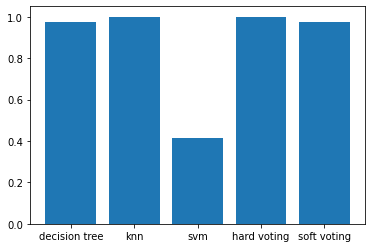

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);